# Лабораторная работа по модулю "Математика и статистика в Python"

In [100]:
!pip install researchpy

In [101]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import pearsonr
from scipy import stats
import researchpy as rp

### 1. Загрузить файл auto.csv

In [2]:
df_auto = pd.read_csv('auto.csv')
df_auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

### 2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
df_auto.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
#мат.ожидание (среднее значение)
df_auto.mean()

symboling                0.834146
normalized-losses      126.365854
wheel-base              98.756585
length                 174.049268
width                   65.907805
height                  53.724878
curb-weight           2555.565854
engine-size            126.907317
bore                     3.324878
stroke                   3.253366
compression-ratio       10.142537
horsepower             106.048780
peak-rpm              5131.463415
city-mpg                25.219512
highway-mpg             30.751220
price                13312.712195
dtype: float64

In [6]:
#MEDIAN медиана
df_auto.median()

symboling                1.00
normalized-losses      122.00
wheel-base              97.00
length                 173.20
width                   65.50
height                  54.10
curb-weight           2414.00
engine-size            120.00
bore                     3.31
stroke                   3.29
compression-ratio        9.00
horsepower              95.00
peak-rpm              5200.00
city-mpg                24.00
highway-mpg             30.00
price                10295.00
dtype: float64

In [7]:
#min значения
df_auto.min()

symboling                     -2
normalized-losses             65
make                 alfa-romero
fuel-type                 diesel
aspiration                   std
num-of-doors                four
body-style           convertible
drive-wheels                 4wd
engine-location            front
wheel-base                  86.6
length                     141.1
width                       60.3
height                      47.8
curb-weight                 1488
engine-type                 dohc
num-of-cylinders           eight
engine-size                   61
fuel-system                 1bbl
bore                        2.54
stroke                      2.07
compression-ratio              7
horsepower                    48
peak-rpm                    4150
city-mpg                      13
highway-mpg                   16
price                       5118
dtype: object

In [8]:
#max значения
df_auto.max()

symboling                3
normalized-losses      256
make                 volvo
fuel-type              gas
aspiration           turbo
num-of-doors           two
body-style           wagon
drive-wheels           rwd
engine-location       rear
wheel-base           120.9
length               208.1
width                 72.3
height                59.8
curb-weight           4066
engine-type          rotor
num-of-cylinders       two
engine-size            326
fuel-system           spfi
bore                  3.94
stroke                4.17
compression-ratio       23
horsepower             288
peak-rpm              6600
city-mpg                49
highway-mpg             54
price                45400
dtype: object

In [66]:
#MODE мода
df_auto.mode()
for col in df_auto.columns:    
    if col!='engine-size' and (df_auto[col].dtypes=='int64' or df_auto[col].dtypes=='float64'):
        print(f'Mode для {df_auto[col].name}: {statistics.mode(df_auto[col])}')

Mode для symboling: 0
Mode для normalized-losses: 161
Mode для wheel-base: 94.5
Mode для length: 157.3
Mode для width: 63.8
Mode для height: 50.8
Mode для curb-weight: 2385
Mode для bore: 3.62
Mode для stroke: 3.4
Mode для compression-ratio: 9.0
Mode для horsepower: 68
Mode для peak-rpm: 5500
Mode для city-mpg: 31
Mode для highway-mpg: 25
Mode для price: 6785


In [67]:
df_auto.mode()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,161.0,toyota,gas,std,four,sedan,fwd,front,94.5,...,92,mpfi,3.62,3.4,9.0,68.0,5500.0,31.0,25.0,6785.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
statistics.mode(df_auto['engine-size'])

StatisticsError: no unique mode; found 2 equally common values

по атрибуту 'engine-size' распределение двумодальное

In [17]:
statistics.mode(df_auto['normalized-losses'])

161

In [23]:
df_auto['normalized-losses'].dtypes

dtype('int64')

In [27]:
#STANDART DEVIATION стандартное отклонение
for col in df_auto.columns:    
    if df_auto[col].dtypes=='int64' or df_auto[col].dtypes=='float64':
        print(f'Sd для {df_auto[col].name}: {statistics.pstdev(df_auto[col])}')

Sd для symboling: 1.242265781250978
Sd для normalized-losses: 35.35185930016389
Sd для wheel-base: 6.007070472147536
Sd для length: 12.307160792874916
Sd для width: 2.1399652518208323
Sd для height: 2.437554874380412
Sd для curb-weight: 519.4086992752507
Sd для engine-size: 41.54100172732021
Sd для bore: 0.2723817438746451
Sd для stroke: 0.31317086087680646
Sd для compression-ratio: 3.962340575219067
Sd для horsepower: 43.36265180640503
Sd для peak-rpm: 479.7588874892529
Sd для city-mpg: 6.526165703262264
Sd для highway-mpg: 6.869626394897537
Sd для price: 8082.686173881863


In [28]:
statistics.pstdev(df_auto['horsepower'])

43.36265180640503

### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [31]:
df_auto_num = df_auto.iloc[:, [0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25]]
df_auto_num

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [32]:
#Выделим колонки в отдельный список
headers = list(df_auto_num.columns.values)

In [33]:
#Нормализуем параметры
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df_auto_num)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.036649,-0.883382,-0.173134,-0.366667,-0.833333,-0.177657,-0.479245,0.328571,-0.419048,-0.750,-0.475000,-0.306122,-0.555556,-0.421053,-0.584082
1,1.0,0.036649,-0.883382,-0.173134,-0.366667,-0.833333,-0.177657,-0.479245,0.328571,-0.419048,-0.750,-0.475000,-0.306122,-0.555556,-0.421053,-0.434884
2,0.2,0.036649,-0.539359,-0.101493,-0.133333,-0.233333,0.035687,-0.313208,-0.800000,0.333333,-0.750,-0.116667,-0.306122,-0.666667,-0.473684,-0.434884
3,0.6,0.036649,-0.230321,0.059701,-0.016667,0.083333,-0.341350,-0.637736,-0.071429,0.266667,-0.625,-0.550000,0.102041,-0.388889,-0.263158,-0.561491
4,0.6,0.036649,-0.253644,0.059701,0.016667,0.083333,0.036462,-0.433962,-0.071429,0.266667,-0.875,-0.441667,0.102041,-0.722222,-0.684211,-0.387717


In [34]:
#При нормализации стираются названия колонок, поэтому необходимо восстановить их:
df_norm.columns = headers
df_norm.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.036649,-0.883382,-0.173134,-0.366667,-0.833333,-0.177657,-0.479245,0.328571,-0.419048,-0.750,-0.475000,-0.306122,-0.555556,-0.421053,-0.584082
1,1.0,0.036649,-0.883382,-0.173134,-0.366667,-0.833333,-0.177657,-0.479245,0.328571,-0.419048,-0.750,-0.475000,-0.306122,-0.555556,-0.421053,-0.434884
2,0.2,0.036649,-0.539359,-0.101493,-0.133333,-0.233333,0.035687,-0.313208,-0.800000,0.333333,-0.750,-0.116667,-0.306122,-0.666667,-0.473684,-0.434884
3,0.6,0.036649,-0.230321,0.059701,-0.016667,0.083333,-0.341350,-0.637736,-0.071429,0.266667,-0.625,-0.550000,0.102041,-0.388889,-0.263158,-0.561491
4,0.6,0.036649,-0.253644,0.059701,0.016667,0.083333,0.036462,-0.433962,-0.071429,0.266667,-0.875,-0.441667,0.102041,-0.722222,-0.684211,-0.387717


In [35]:
len(df_norm)

205

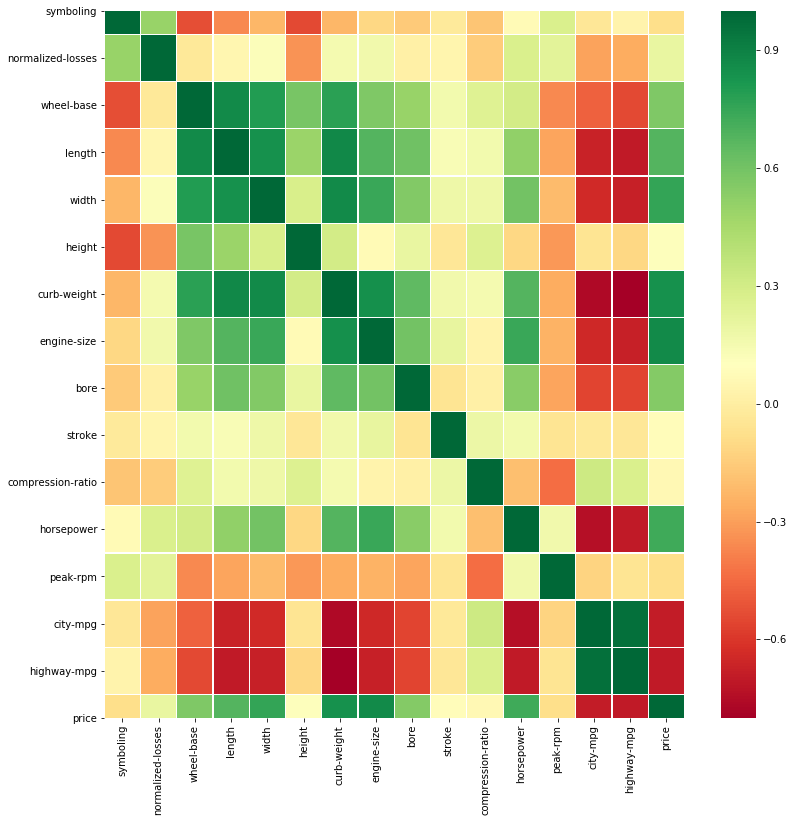

In [41]:
#Построим матрицу корреляций:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(df_auto_num.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

- наиболее сильная полож. корреляция 'city-mpg' и 'highway-mpg' (темно-зеленый цвет)
- больше сильно выраражнной отриц. коррелации, например, 'curb-weigth' и 'highway-mpg' (бордовый цвет)

In [43]:
#матрица корреляции
corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.00,0.50,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.16,-0.02,-0.18,0.07,0.27,-0.04,0.03,-0.08
normalized-losses,0.50,1.00,-0.03,0.05,0.12,-0.33,0.15,0.17,0.01,0.04,-0.15,0.27,0.23,-0.29,-0.26,0.20
wheel-base,-0.53,-0.03,1.00,0.87,0.80,0.59,0.78,0.57,0.50,0.16,0.25,0.30,-0.36,-0.47,-0.54,0.57
length,-0.36,0.05,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.52,-0.28,-0.67,-0.70,0.68
width,-0.23,0.12,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.60,-0.21,-0.64,-0.68,0.76
height,-0.54,-0.33,0.59,0.49,0.28,1.00,0.30,0.07,0.20,-0.04,0.26,-0.11,-0.32,-0.05,-0.11,0.11
curb-weight,-0.23,0.15,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.68,-0.26,-0.76,-0.80,0.84
engine-size,-0.11,0.17,0.57,0.68,0.74,0.07,0.85,1.00,0.60,0.21,0.03,0.74,-0.24,-0.65,-0.68,0.87
bore,-0.16,0.01,0.50,0.61,0.56,0.20,0.65,0.60,1.00,-0.05,0.01,0.54,-0.28,-0.56,-0.56,0.55
stroke,-0.02,0.04,0.16,0.13,0.18,-0.04,0.17,0.21,-0.05,1.00,0.19,0.16,-0.05,-0.03,-0.04,0.08


### 4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

Text(0.5, 1.0, 'гистограмма распределения цен')

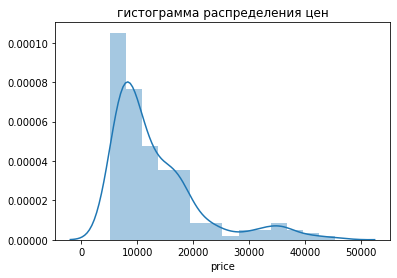

In [47]:
#гистограмма распределения Price
sns_plot1 = sns.distplot(df_auto['price'])
fig1 = sns_plot1.get_figure()
plt.title('гистограмма распределения цен')

In [56]:
skew(df_auto['price'])

1.7534486514523662

In [59]:
kurtosis(df_auto['price'], fisher=True)

2.848082544390688

* skew=1.75 - коэффицие́нт асимметри́и в теории вероятностей — величина, характеризующая асимметрию распределения данной случайной величины: положительное - выборка наклонена вправо
* kurt=2.85 - коэффицие́нт эксце́сса - мера остроты пика

### 5. Визуализировать несколько взаимосвязей между переменными

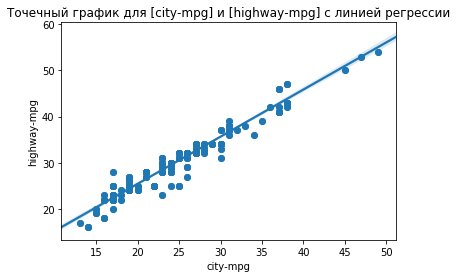

In [64]:
plt.scatter(df_auto['city-mpg'], df_auto['highway-mpg'])

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x=df_auto['city-mpg'], y=df_auto['highway-mpg'], data=df_auto, fit_reg=True)

plt.title('Точечный график для [city-mpg] и [highway-mpg] с линией регрессии')
plt.show()

наблюдается сильная полож. корреляция 'city-mpg' и 'highway-mpg', можно предположить линейную зависимость
- при большем значении расхода топлива в городе (галлоны) - большее значение расхода топлива на трассе

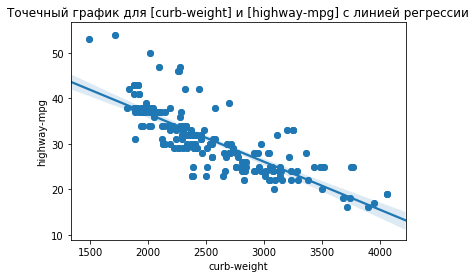

In [65]:
plt.scatter(df_auto['curb-weight'], df_auto['highway-mpg'])

# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x=df_auto['curb-weight'], y=df_auto['highway-mpg'], data=df_auto, fit_reg=True)

plt.title('Точечный график для [curb-weight] и [highway-mpg] с линией регрессии')
plt.show()

наблюдается сильная отриц. корреляция 'curb-weight' и 'highway-mpg', можно предположить линейную зависимость

### 6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

In [70]:
df_ = df_auto.filter(items=['make','price','city-mpg','highway-mpg','curb-weight'])
df_

,make,price,city-mpg,highway-mpg,curb-weight
0,alfa-romero,13495,21,27,2548
1,alfa-romero,16500,21,27,2548
2,alfa-romero,16500,19,26,2823
3,audi,13950,24,30,2337
4,audi,17450,18,22,2824
...,...,...,...,...,...
200,volvo,16845,23,28,2952
201,volvo,19045,19,25,3049
202,volvo,21485,18,23,3012
203,volvo,22470,26,27,3217


### тест на нормальность

Тест Шапиро-Вилка проверяет, имеет ли выборка данных распределение Гаусса:
* Гипотеза H0 - образец имеет нормальное гауссово распределение
* гипотеза H1 - образец не имеет нормальное распределение


* p <= alpha: reject H0, not normal.
* p > alpha: fail to reject H0, normal.

**проверим атрибут Цена 'price' на нормальность распределения**

In [82]:
from scipy.stats import shapiro

alpha = 0.05
stat, p = shapiro(df_auto['price'])
#print('stat=%.3f, p=%.3f' % (stat, p))
print(f'stat={stat}, p={p}')
if p > alpha:
# 
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.7991148233413696, p=1.6031872002020948e-15
Probably not Gaussian


In [90]:
k2, p = stats.normaltest(df_norm['price'])
alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("Не нормальное распределение для alpha значения = ", str(alpha))
else:
    print("Нормальное распределение для alpha значения = ", str(alpha))

p = 2.71102e-17
Не нормальное распределение для alpha значения =  0.05


действительно, гистогорамма также не похожа на нормальное распределение

### связаны ли две выборки - имеют ли данные выборки зависимость.

Коэффициент корреляции Пирсона

Проверяет, имеют ли два образца линейную связь.

H0: два образца независимы
H1: существует зависимость между образцами.

**проверим для 'city-mpg' и 'highway-mpg'**

In [72]:
#Коэффициент корреляции Пирсона
pearsonr(df_auto['city-mpg'], df_auto['highway-mpg'])

(0.9713370423425043, 1.2487392495866829e-128)

Коэффициент корреляции Пирсона = 0.97, это очень высокая связь (положительная)

In [76]:
1.2487392495866829*10**(-128)<0.05

True

In [91]:
stats.ttest_ind(df_auto['city-mpg'], df_auto['highway-mpg'])

Ttest_indResult(statistic=-8.338312640543368, pvalue=1.1688699865371373e-15)

In [93]:
1.1688699865371373*10**(-15)<0.05

True

p-value < 0.05 (нет оснований для отклонения нулевой гипотезы), поэтому можно сказать что имеется статистическое различие между атрибутами 'city-mpg' и 'highway-mpg'

**проверим 'curb-weight' и 'highway-mpg'**

In [77]:
#Коэффициент корреляции Пирсона
pearsonr(df_auto['curb-weight'], df_auto['highway-mpg'])

(-0.7974647922811792, 2.0071267274793156e-46)

Коэффициент корреляции Пирсона = -0.8, это высокая связь (отрицательная) - изменение одной величины может привести к противоположному изменению другой

In [92]:
stats.ttest_ind(df_auto['curb-weight'], df_auto['highway-mpg'])

Ttest_indResult(statistic=69.42204177396812, pvalue=4.5493272520338033e-228)

In [94]:
4.5493272520338033*10**(-228)<0.05

True

p-value < 0.05 (нет оснований для отклонения нулевой гипотезы), поэтому можно сказать что имеется статистическое различие между атрибутами 'curb-weight' и 'highway-mpg'

**Функция для подсчета t-test**

In [103]:
descriptives, results = rp.ttest(df_auto['curb-weight'], df_auto['highway-mpg'])

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,curb-weight,205.0,2555.565854,520.680204,36.365883,2483.864665,2627.267043
1,highway-mpg,205.0,30.751220,6.886443,0.480970,29.802910,31.699529
2,combined,410.0,1293.158537,1316.364276,65.010598,1165.361934,1420.955139


In [104]:
results

,Independent t-test,results
0,Difference (curb-weight - highway-mpg) =,2524.8146
1,Degrees of freedom =,408.0000
2,t =,69.4220
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,6.8570
7,Hedge's g =,6.8444
8,Glass's delta =,4.8491
9,r =,0.9602


также p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами.